# Data Input and preprocessing

In [1]:
import numpy as np
from real_data_function import loadData,showData, removenans, preprocessing, showDistribution, crossplot, output, plotResult
from function import kMeans, Hdbscan, kmeans_param,  Kmeans_cluster_ch, Kmeans_cluster_sc, hdbscan_param
from function import hdbscan_cluster, hdbscan_sample, calculateAri, calculateAmi, calculateVm, output_2D, plotInputData

## Load Data

In [2]:
data_vp = np.loadtxt('C:/Users/12928/Desktop/SyntheticDatasets/P-wave_output_monte_carlo_correct.xyz')
data_vs = np.loadtxt('C:/Users/12928/Desktop/SyntheticDatasets/S-wave_output_correct.xyz')
xy = np.loadtxt('C:/Users/12928/Desktop/SyntheticDatasets/S-wave_mask.xyz')
data = loadData(data_vp,data_vs,xy)
# vp = data_vp[:,2].reshape(-1,1)
# vs = data_vs[:,2].reshape(-1,1)
# vpvs=vp*vs
# vpvs_d = vp/vs
# poisson = (vpvs_d**2-2)/(vpvs_d**2-1)/2
# data = np.concatenate((vp,vs,vpvs,vpvs_d,poisson,xy),axis=1)

c:\Users\12928\Desktop\feedback\real_data_function.py:12: RuntimeWarning: divide by zero encountered in true_divide
  poisson = (vpvs_d**2-2)/(vpvs_d**2-1)/2


## Plot Input Data

Using function show_data() to draw each parameter of input data. 

There are three parameters of show_data(), which are dataset, the number of rows and the number of columns.

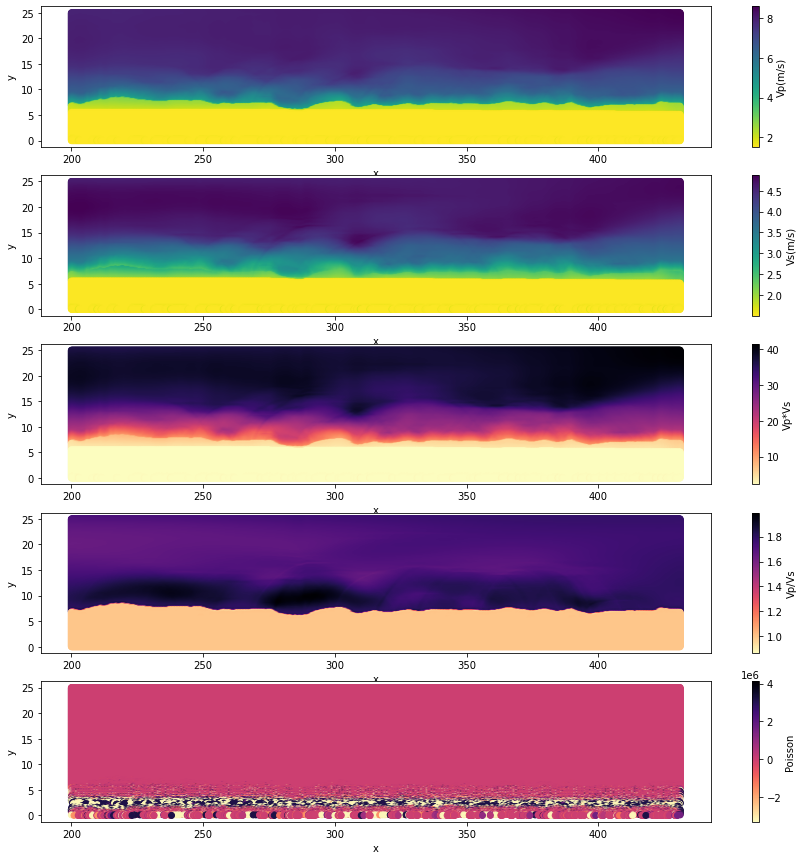

In [3]:
showData(data,5,1)

Using removenans() to remove points with nan values from array. 

- new_data is the original data saved in the form of np.array.

- data_noNan removes nan values from new_data. 

- nan_list is the list of nan values index.

In [4]:
data_noNan,nan_list = removenans(data)

Using showDistribution() to show the distribution of each parameter. Since the last two parameters of new_data is 'x' and 'z', we only use new_data[:,:-2]

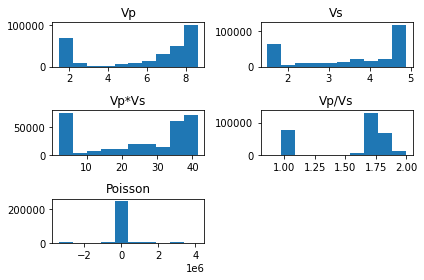

In [5]:
showDistribution(data)

Using crossplot to plot the cross-plot (scatter plot) of each pair of physical properties (other parameters and vp)

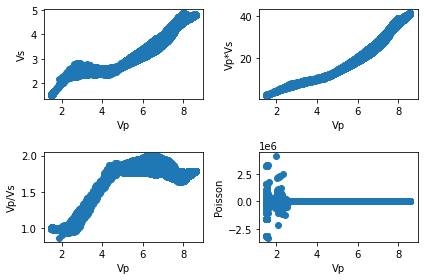

In [6]:
crossplot(data)

## Data Preprocessing

Using preprocessing() to make data standardized

In [7]:
# remove the mean
# divide by the variance

data_preprocessing = preprocessing(data_noNan) 


## Plot Data after Preprocessing

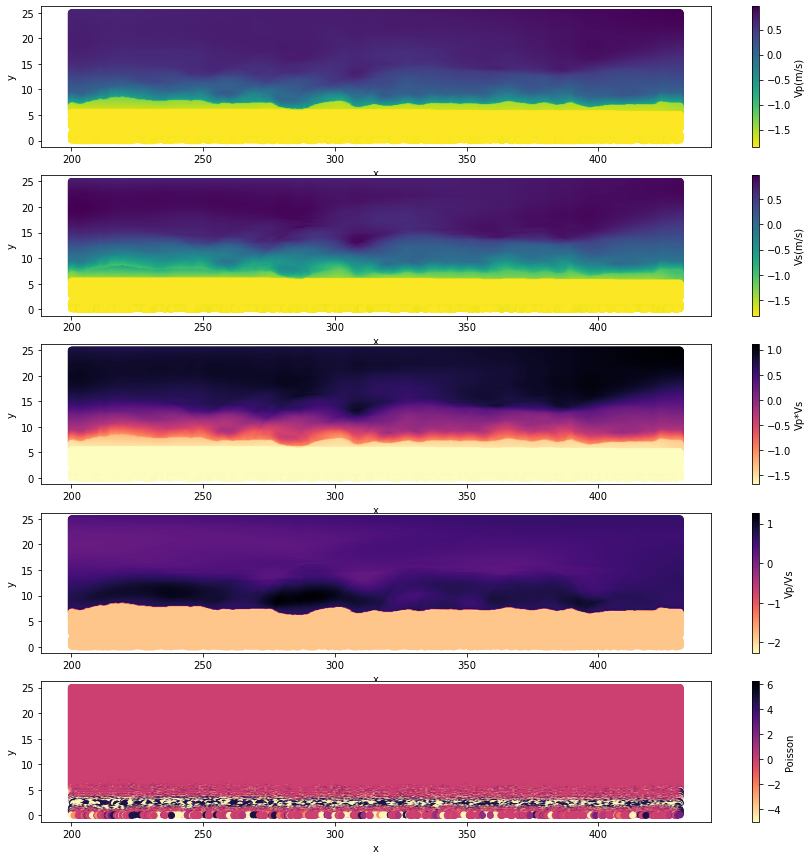

In [8]:
showData(data_preprocessing,5,1)

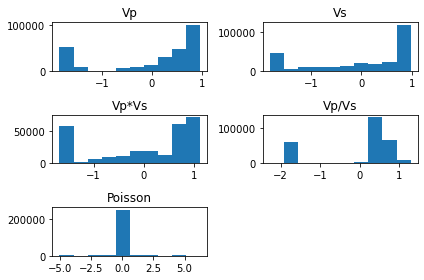

In [9]:
showDistribution(data_preprocessing)

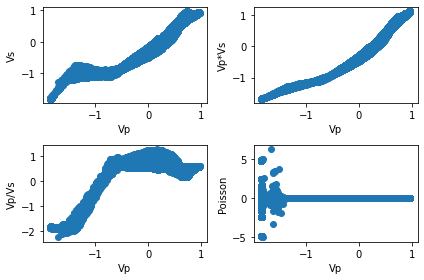

In [10]:
crossplot(data_preprocessing)

## KMeans

Using KMeans() to divide data in clusters.

- result_k is the result of KMeans and data_preprocessing is normalized data with no nan value
- output_k is labels for all data after KMeans

Using plotResult() to show the result of clusters.

- data is the original input data
- output_k is labels for all data after Kmeans

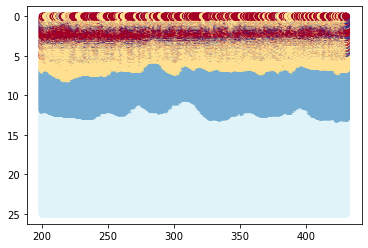

In [11]:
result_k = kMeans(4, data_preprocessing[:,:-2])
output_k = output(result_k,nan_list)
plotResult(data,output_k)

## Tuning Parameters

Using Kmeans_param() to tuning KMeans parameters and print the best parameters

In [12]:
kmeans_param(data_preprocessing[:,:-2])

{'the best number of cluster': 14 }


Plotting result of best parameters.
KMeans() have three parameters.
- The first one is the number of clusters.
- The second one is dataset.
- The third one is the maximun iteration times. It has default value 1000.

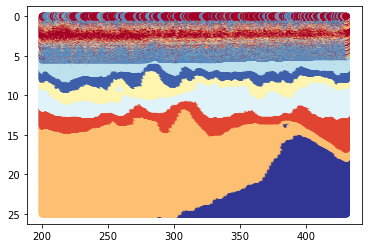

In [13]:
result_k = kMeans(14, data_preprocessing[:,:-2])
output_k = output(result_k,nan_list)
plotResult(data,output_k)

## Validation
### Calinsky-Harabasz score

Using Kmeans_cluster_ch to see changes of calinsky-Harabasz score with the number of clusters changing.

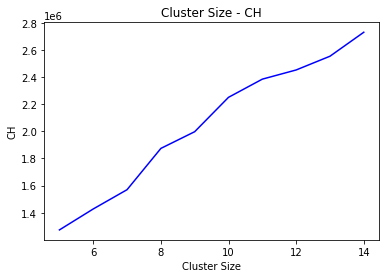

In [14]:
Kmeans_cluster_ch(data_preprocessing[:,:-2])

### Silhouette score

Using Kmeans_cluster_sc to see changes of silhouette score with the number of clusters changing.

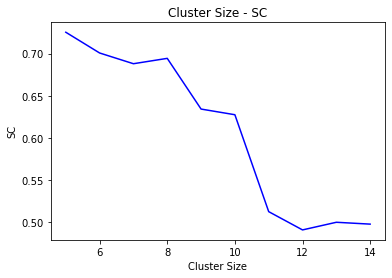

In [15]:
Kmeans_cluster_sc(data_preprocessing[:,:-2])

## HDBSCAN

Using Hdbscan() to divide data in clusters.

- result_h is the result of Hdbscan and data_preprocessing is normalized data with no nan value
- output_h is labels for all data after Hdbscan

Using plotResult() to show the result of clusters.

- data is the original input data
- output_h is labels for all data after Hdbscan

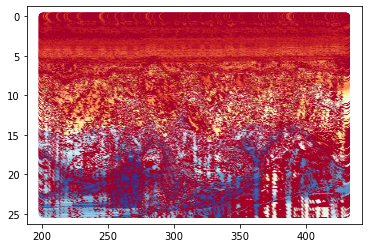

In [16]:
result_h, score_h = Hdbscan(data_preprocessing[:,:-2])
output_h = output(result_h,nan_list)
plotResult(data,output_h)

## Tuning Parameters

Using hdbscan_param() to tuning HDBSCAN parameters

In [17]:
hdbscan_param(data_preprocessing[:,:-2])

{'min_cluster_size': 10 'min_sample_size': 25 }


Plotting result of best parameters.
Hdbscan() have three parameters.
- The first one is the dataset.
- The second one is the minimum size of clusters. It has default value 4.
- The third one is the minimum size of samples. It has default value 10.

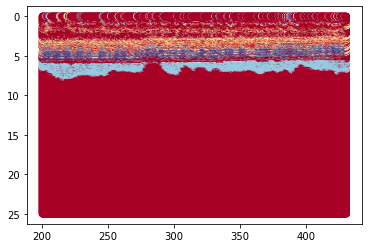

In [28]:
result_h, score_h = Hdbscan(data_preprocessing[:,:-2],min_size=10,min_sample=25)
output_h = output(result_h,nan_list)
plotResult(data,output_h)

## Validation

Using hdbscan_cluster to see changes of relative validity with the minimum size of clusters changing.

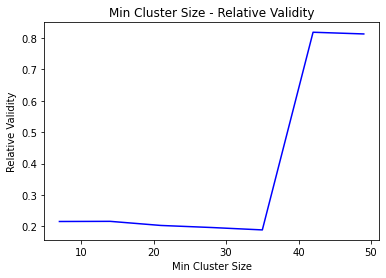

In [19]:
hdbscan_cluster(data_preprocessing[:,:-2])

Using hdbscan_sample to see changes of relative validity with the minimum size of samples changing.

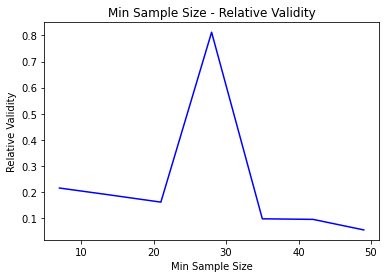

In [20]:
hdbscan_sample(data_preprocessing[:,:-2])

## Testing with Various Input Parameters

Testing with different sets of characteristics.

Dataset has 8 characteristics called Vp, Vs, Density, Vp/Vs, Qp, Qs, x, z, and the index of them is 0, 1, 2, 3, 4, 5, 6, 7.

In [29]:
testData1 = data_preprocessing[:,[0,1,3]]
testData2 = data_preprocessing[:,[0,1]]

- testData1 selects Vp, Vs and Vp/Vs.
- testData2 selects Vp, Density and Qp.
- testData3 selectes Vp and Vs.

## Vp, Vs, Vp/Vs

### KMeans

In [30]:
kmeans_param(testData1)

{'the best number of cluster': 11 }


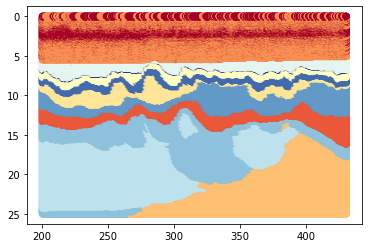

In [31]:
result_k = kMeans(11, testData1)
output_k = output(result_k,nan_list)
plotResult(data,output_k)

### HDBSCAN

In [32]:
hdbscan_param(testData1)

{'min_cluster_size': 35 'min_sample_size': 40 }


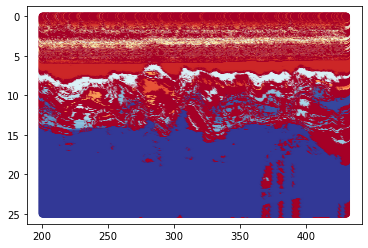

0.5624076499487085


In [33]:
result_h, score_h = Hdbscan(testData1,min_size=35,min_sample=40)
output_h = output(result_h,nan_list)
plotResult(data,output_h)
print(score_h)

## Vp, Vs

### KMeans

In [34]:
kmeans_param(testData2)

{'the best number of cluster': 14 }


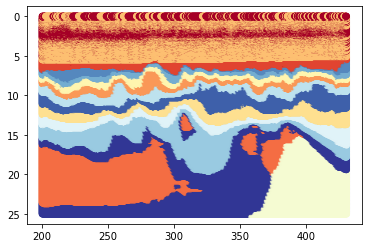

In [35]:
result_k = kMeans(14, testData2)
output_k = output(result_k,nan_list)
plotResult(data,output_k)

### HDBSCAN

In [36]:
hdbscan_param(testData2)

{'min_cluster_size': 10 'min_sample_size': 35 }


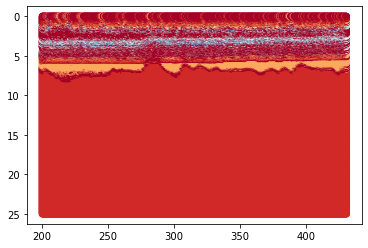

0.7455833431942729


In [38]:
result_h, score_h = Hdbscan(testData2,min_size=10,min_sample=35)
output_h = output(result_h,nan_list)
plotResult(data,output_h)
print(score_h)